# 1. Load Dataset

In [1]:
import pandas as pd

c:\Users\Ekkar\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Ekkar\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
before_ai_data = pd.read_csv("./Intern Dataset/before_ai_plant_data.csv")
after_ai_data = pd.read_csv("./Intern Dataset/after_ai_plant_data.csv")
weather = pd.read_csv("./Intern Dataset/weather_data_Thailand.csv")

The weather data used in this project was obtained from Visual Crossing.

Link: "https://www.visualcrossing.com/weather-query-builder/%E0%B8%81%E0%B8%A3%E0%B8%B8%E0%B8%87%E0%B9%80%E0%B8%97%E0%B8%9E%E0%B8%A1%E0%B8%AB%E0%B8%B2%E0%B8%99%E0%B8%84%E0%B8%A3,%20%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2/metric/#"

In [3]:
before_ai_data = before_ai_data.rename(columns={
    'plant_energy': 'plant_energy_before(kwh)',
})
after_ai_data = after_ai_data.rename(columns={
    'plant_energy': 'plant_energy_after(kwh)',
})

In [4]:
before_ai_data.head()

,date,plant_energy_before(kwh)
0,2023-01-01,31124.0
1,2023-01-02,27481.0
2,2023-01-03,34559.0
3,2023-01-04,35418.0
4,2023-01-05,37479.0


In [5]:
after_ai_data.head()

,date,plant_energy_after(kwh)
0,2024-09-02,51857.0
1,2024-09-03,52817.5
2,2024-09-04,50493.5
3,2024-09-05,49655.5
4,2024-09-06,52470.0


In [11]:
weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"กรุงเทพมหานคร, ประเทศไทย",2023-01-01,30.1,20.2,24.8,29.9,20.2,24.8,16.0,59.6,...,8.7,5,10,2023-01-01T06:41:29,2023-01-01T18:01:13,0.30,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48429099999,E4214,48455099999,VTBS,VTBD,484530..."
1,"กรุงเทพมหานคร, ประเทศไทย",2023-01-02,30.4,21.0,25.3,32.3,21.0,25.6,16.7,59.8,...,8.8,4,10,2023-01-02T06:41:52,2023-01-02T18:01:47,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48429099999,E4214,48455099999,VTBS,VTBD,484530..."
2,"กรุงเทพมหานคร, ประเทศไทย",2023-01-03,30.5,23.7,26.9,32.3,23.7,27.5,18.2,59.2,...,8.5,6,10,2023-01-03T06:42:13,2023-01-03T18:02:21,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48429099999,E4214,48455099999,VTBS,VTBD,484530..."
3,"กรุงเทพมหานคร, ประเทศไทย",2023-01-04,32.0,25.0,27.6,33.4,25.0,28.1,17.9,56.1,...,9.0,5,10,2023-01-04T06:42:34,2023-01-04T18:02:56,0.41,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"48429099999,E4214,48455099999,VTBS,VTBD,484530..."
4,"กรุงเทพมหานคร, ประเทศไทย",2023-01-05,32.3,23.2,27.2,33.8,23.2,27.8,18.4,59.5,...,8.3,4,10,2023-01-05T06:42:54,2023-01-05T18:03:30,0.44,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48429099999,E4214,48455099999,VTBS,VTBD,484530..."


In [12]:
weather.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [13]:
weather = weather[['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'humidity','windspeed', 'uvindex']]

In [14]:
weather = weather.rename(columns={
    'datetime': 'date',
})

# 2. Explore Data

In [15]:
before_ai_data['date'] = pd.to_datetime(before_ai_data['date'])
after_ai_data['date'] = pd.to_datetime(after_ai_data['date'])
weather['date'] = pd.to_datetime(weather['date'])

In [16]:
print(before_ai_data[before_ai_data["plant_energy_before(kwh)"]!=0])
print(before_ai_data[before_ai_data["plant_energy_before(kwh)"]==0])


          date  plant_energy_before(kwh)
0   2023-01-01                   31124.0
1   2023-01-02                   27481.0
2   2023-01-03                   34559.0
3   2023-01-04                   35418.0
4   2023-01-05                   37479.0
..         ...                       ...
570 2024-07-24                   54645.0
571 2024-07-25                   54741.0
572 2024-07-26                   58047.0
573 2024-07-27                   54655.0
574 2024-07-28                   54567.0

[575 rows x 2 columns]
          date  plant_energy_before(kwh)
575 2024-07-30                       0.0
576 2024-07-31                       0.0
577 2024-08-01                       0.0
578 2024-08-02                       0.0
579 2024-08-03                       0.0
..         ...                       ...
725 2024-12-27                       0.0
726 2024-12-28                       0.0
727 2024-12-29                       0.0
728 2024-12-30                       0.0
729 2024-12-31                   

In [17]:
print(after_ai_data[after_ai_data["plant_energy_after(kwh)"]!=0])
print(after_ai_data[after_ai_data["plant_energy_after(kwh)"]==0])

          date  plant_energy_after(kwh)
0   2024-09-02                  51857.0
1   2024-09-03                  52817.5
2   2024-09-04                  50493.5
3   2024-09-05                  49655.5
4   2024-09-06                  52470.0
..         ...                      ...
178 2025-02-27                  48390.0
179 2025-02-28                  53064.0
180 2025-03-01                  52680.0
181 2025-03-02                  52420.0
182 2025-03-03                  54702.0

[183 rows x 2 columns]
Empty DataFrame
Columns: [date, plant_energy_after(kwh)]
Index: []


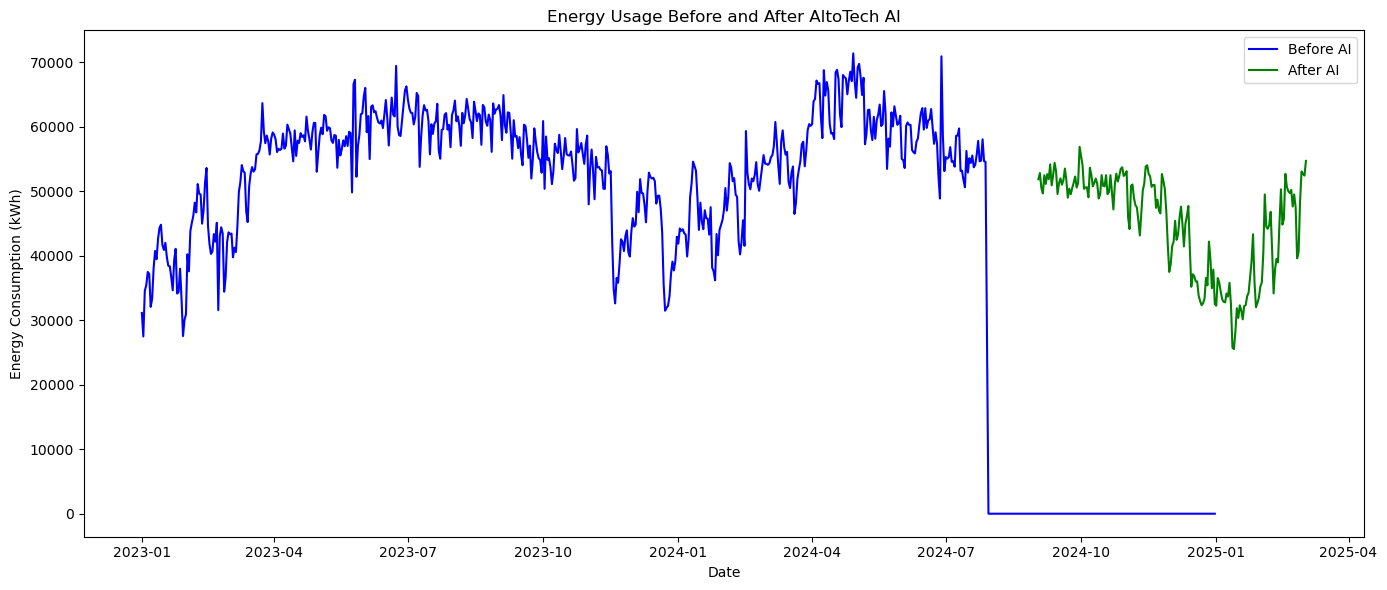

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(before_ai_data['date'], before_ai_data['plant_energy_before(kwh)'], label='Before AI', color='blue')
plt.plot(after_ai_data['date'], after_ai_data['plant_energy_after(kwh)'], label='After AI', color='green')

plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Usage Before and After AltoTech AI')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()


1. Period before install the AltoTech AI: 2023-01-01 to 2024-07-28
2. Period install the AltoTech AI: 2024-07-29 to 2024-09-01
3. Period after install the AltoTech AI: 2024-09-02 to 2025-03-03

In [19]:
# descriptive statistics for kWh usage before install the AltoTech AI
before_ai_data[before_ai_data["plant_energy_before(kwh)"]!=0].describe()

,date,plant_energy_before(kwh)
count,575,575.000000
mean,2023-10-15 00:00:00,54182.699130
min,2023-01-01 00:00:00,27481.000000
25%,2023-05-24 12:00:00,49776.500000
50%,2023-10-15 00:00:00,56070.000000
75%,2024-03-06 12:00:00,60300.500000
max,2024-07-28 00:00:00,71375.000000
std,NaN,8568.051285


In [20]:
# descriptive statistics for kWh usage after install the AltoTech AI
after_ai_data.describe()

,date,plant_energy_after(kwh)
count,183,183.000000
mean,2024-12-02 00:00:00,44969.695355
min,2024-09-02 00:00:00,25528.000000
25%,2024-10-17 12:00:00,37658.500000
50%,2024-12-02 00:00:00,47632.000000
75%,2025-01-16 12:00:00,51203.250000
max,2025-03-03 00:00:00,56882.000000
std,NaN,7750.322126


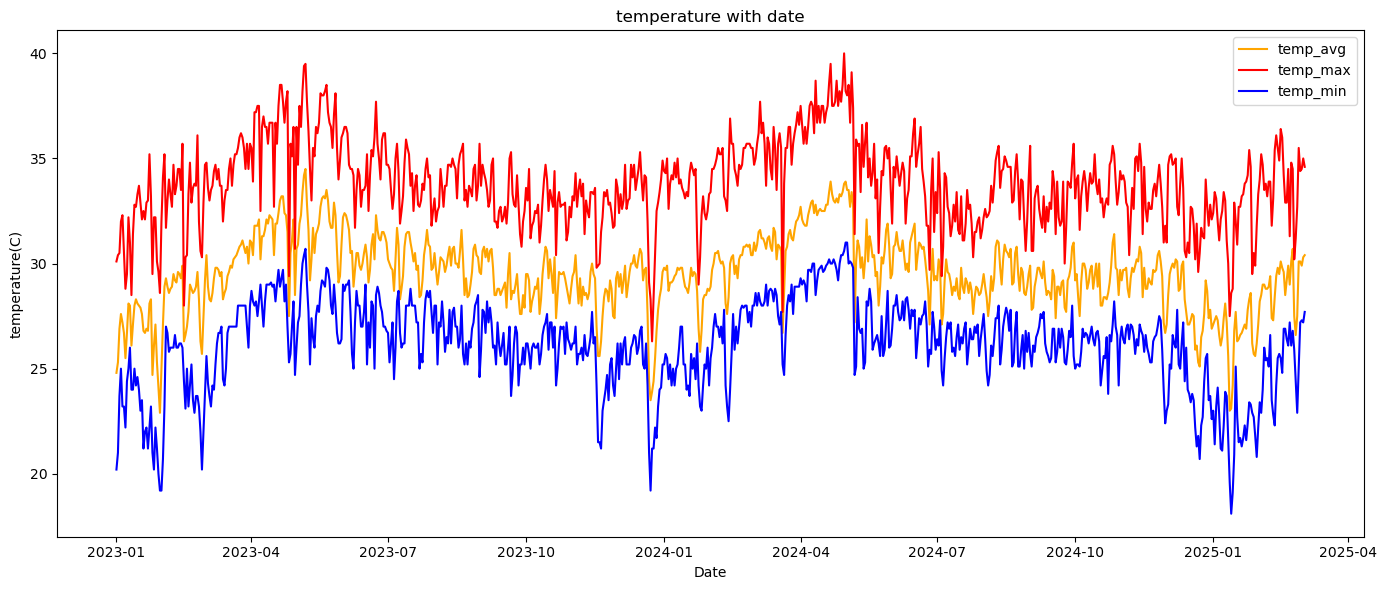

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(weather['date'], weather['temp'], label='temp_avg', color='orange')
plt.plot(weather['date'], weather['tempmax'], label='temp_max', color='red')
plt.plot(weather['date'], weather['tempmin'], label='temp_min', color='blue')

plt.xlabel('Date')
plt.ylabel('temperature(C)')
plt.title('temperature with date')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()


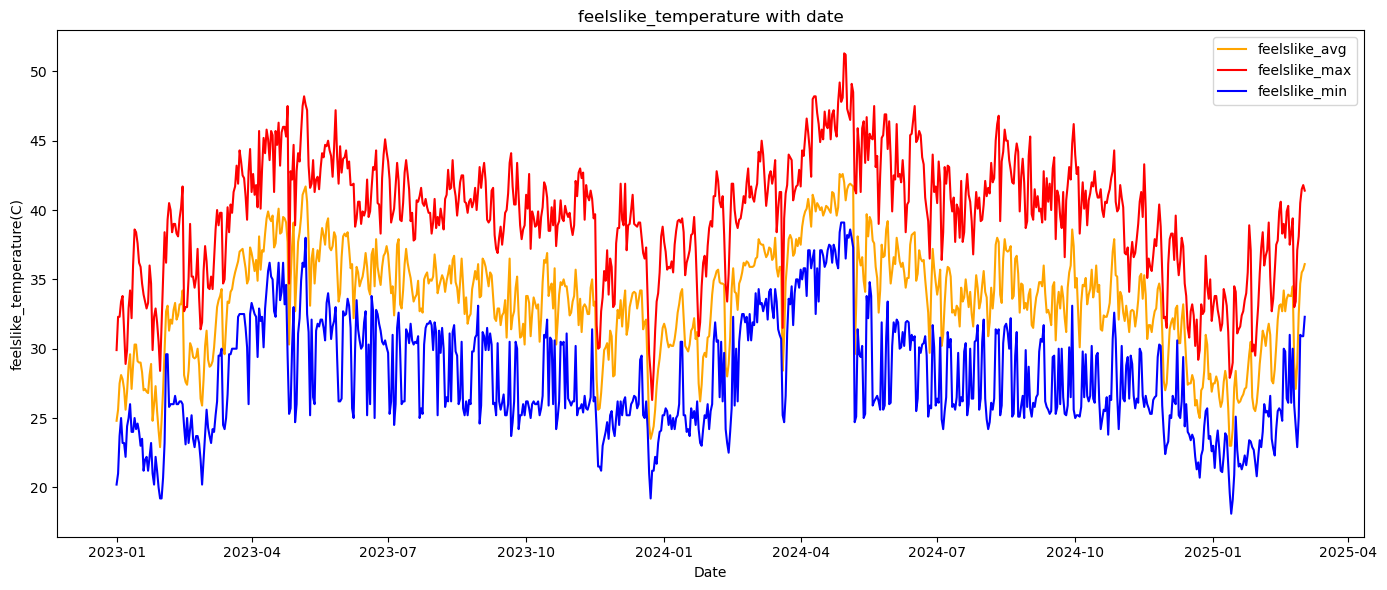

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(weather['date'], weather['feelslike'], label='feelslike_avg', color='orange')
plt.plot(weather['date'], weather['feelslikemax'], label='feelslike_max', color='red')
plt.plot(weather['date'], weather['feelslikemin'], label='feelslike_min', color='blue')

plt.xlabel('Date')
plt.ylabel('feelslike_temperature(C)')
plt.title('feelslike_temperature with date')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()


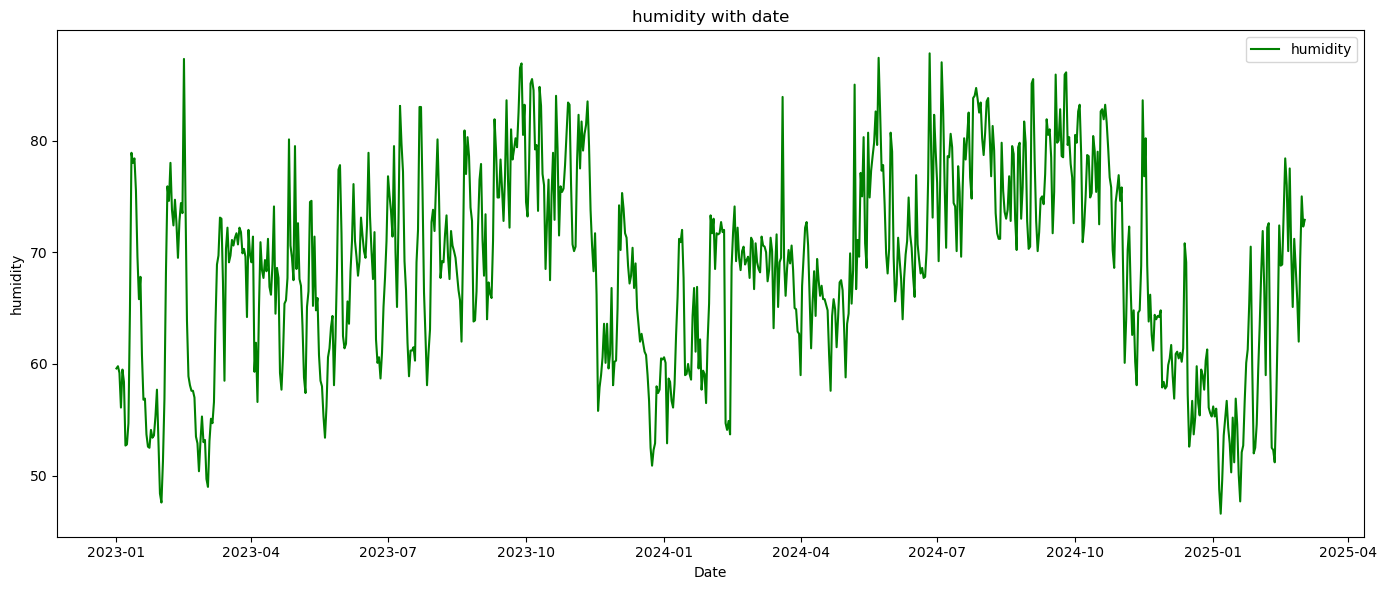

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(weather['date'], weather['humidity'], label='humidity', color='green')

plt.xlabel('Date')
plt.ylabel('humidity')
plt.title('humidity with date')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()


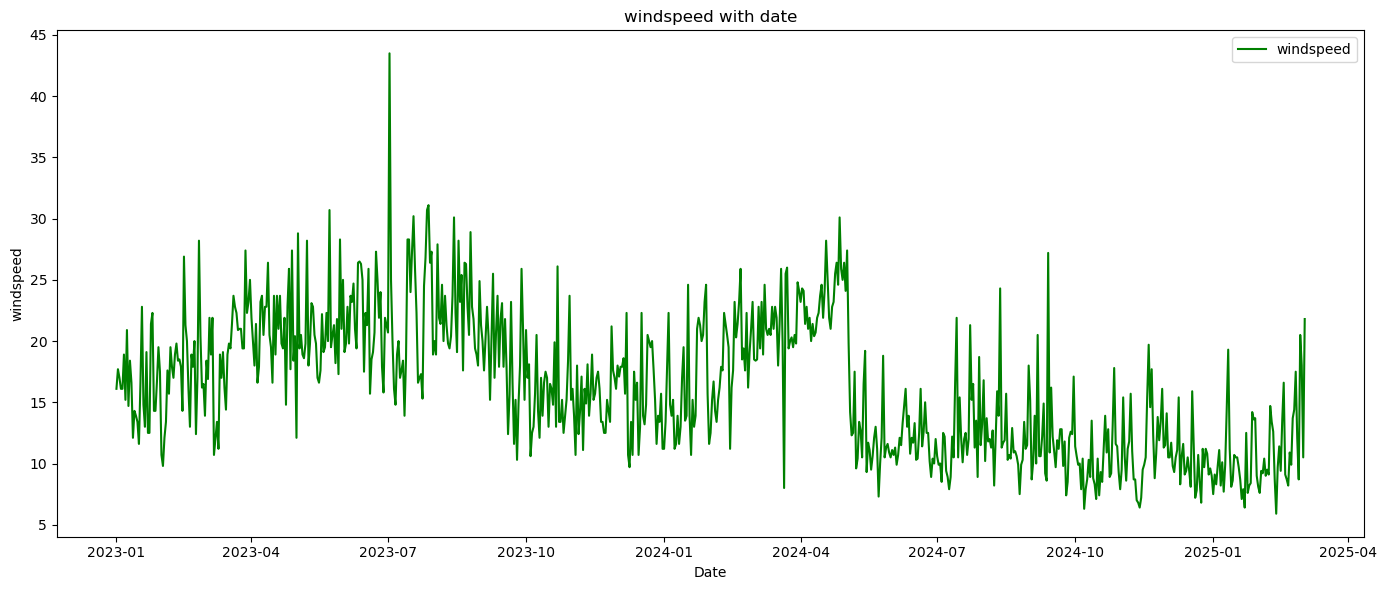

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(weather['date'], weather['windspeed'], label='windspeed', color='green')

plt.xlabel('Date')
plt.ylabel('windspeed')
plt.title('windspeed with date')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()


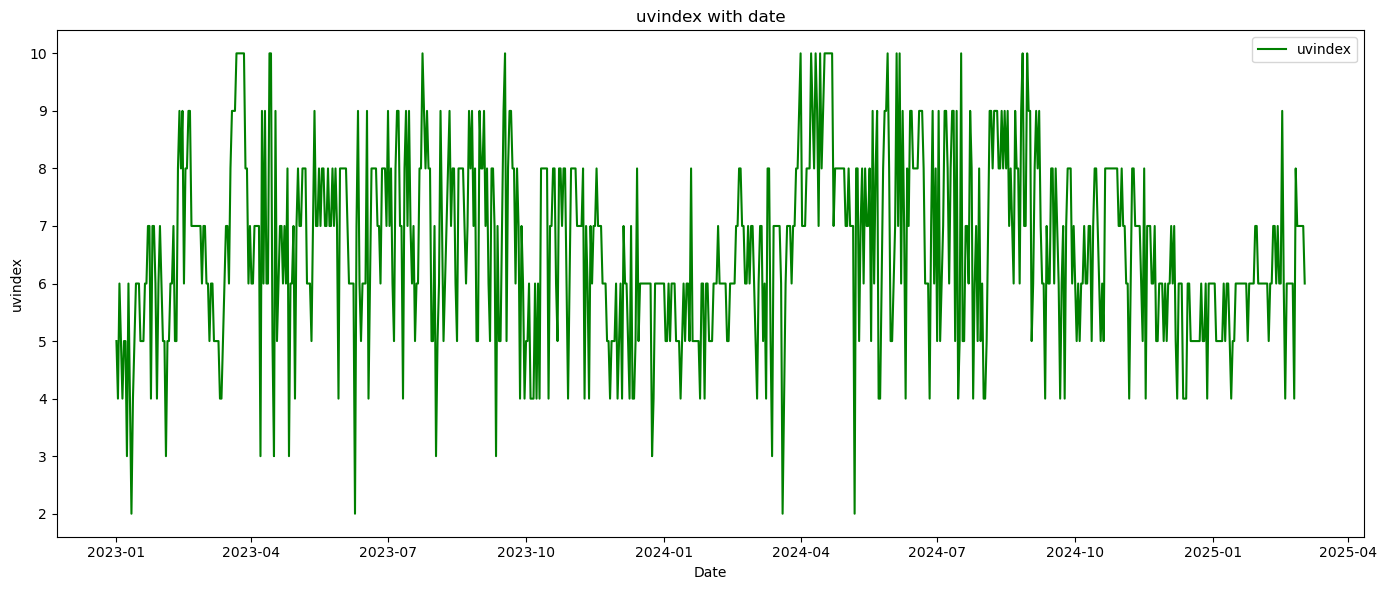

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(weather['date'], weather['uvindex'], label='uvindex', color='green')

plt.xlabel('Date')
plt.ylabel('uvindex')
plt.title('uvindex with date')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
weather.describe()

,date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,windspeed,uvindex
count,793,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,2024-02-01 00:00:00.000000256,33.843253,26.147415,29.538335,39.777427,27.880328,33.524212,68.704918,16.264817,6.605296
min,2023-01-01 00:00:00,26.300000,18.100000,22.900000,26.300000,18.100000,22.900000,46.600000,5.900000,2.000000
25%,2023-07-18 00:00:00,32.600000,25.200000,28.600000,37.600000,25.200000,31.300000,61.900000,11.400000,6.000000
50%,2024-02-01 00:00:00,33.800000,26.300000,29.600000,40.200000,26.300000,33.900000,69.500000,16.100000,7.000000
75%,2024-08-17 00:00:00,35.100000,27.600000,30.600000,42.500000,31.000000,36.000000,75.000000,20.500000,8.000000
max,2025-03-03 00:00:00,40.000000,31.000000,34.500000,51.300000,39.100000,42.600000,87.800000,43.500000,10.000000
std,NaN,2.028362,2.118407,1.783218,4.187904,4.065293,3.768013,8.710690,5.563301,1.568897


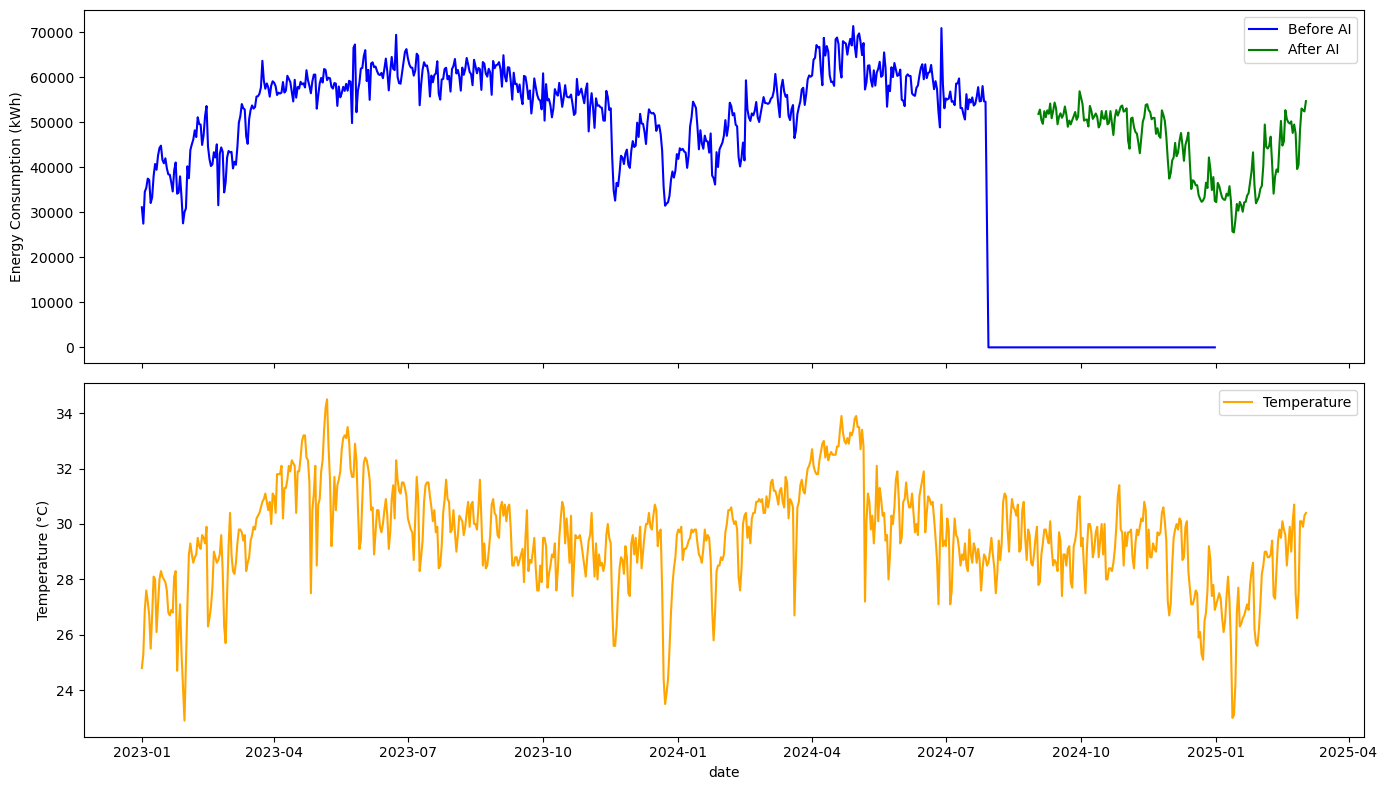

In [27]:
# Two separate subplots instead of twin axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

ax1.plot(before_ai_data['date'], before_ai_data['plant_energy_before(kwh)'], label='Before AI', color='blue')
ax1.plot(after_ai_data['date'], after_ai_data['plant_energy_after(kwh)'], label='After AI', color='green')
ax1.set_ylabel("Energy Consumption (kWh)")
ax1.legend()

ax2.plot(weather['date'], weather['temp'], label='Temperature', color='orange')
ax2.set_ylabel("Temperature (°C)")
ax2.set_xlabel("date")
ax2.legend()

plt.tight_layout()
plt.show()


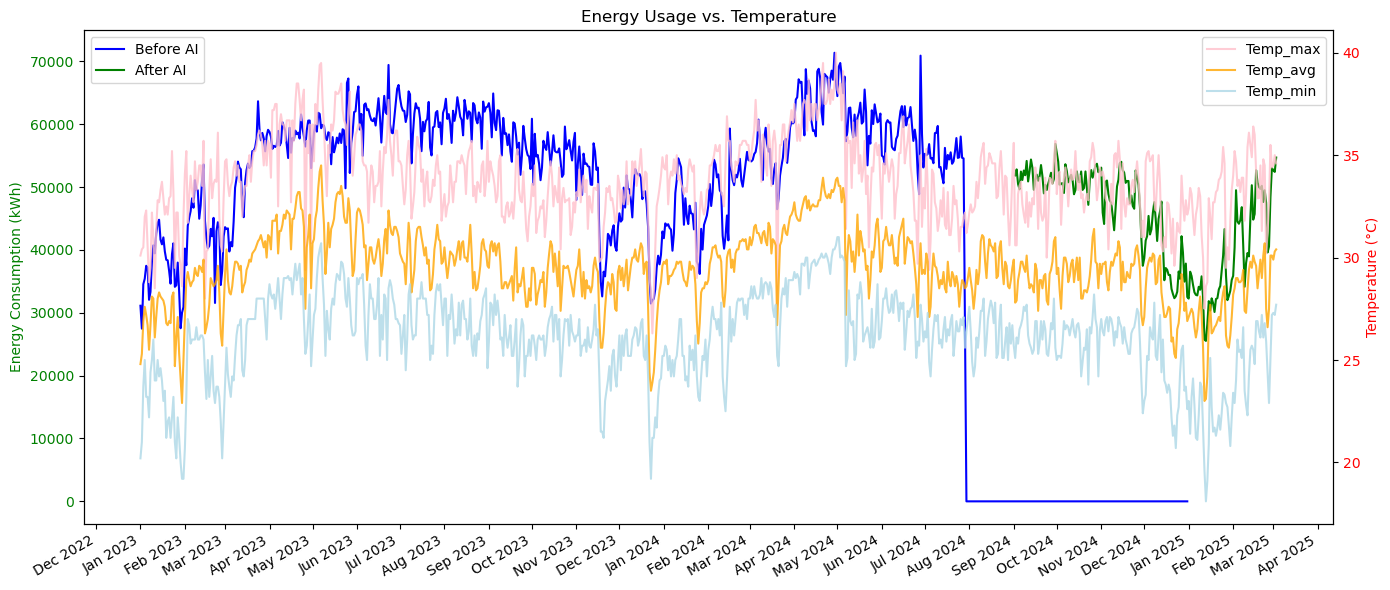

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot energy usage
ax1.plot(before_ai_data['date'], before_ai_data['plant_energy_before(kwh)'], label='Before AI', color='blue')
ax1.plot(after_ai_data['date'], after_ai_data['plant_energy_after(kwh)'], label='After AI', color='green')
ax1.set_ylabel("Energy Consumption (kWh)", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left')

# Plot temperature on second y-axis
ax2 = ax1.twinx()
ax2.plot(weather['date'], weather['tempmax'], label='Temp_max', color='pink', alpha=0.8)
ax2.plot(weather['date'], weather['temp'], label='Temp_avg', color='orange', alpha=0.8)
ax2.plot(weather['date'], weather['tempmin'], label='Temp_min', color='lightblue', alpha=0.8)
ax2.set_ylabel("Temperature (°C)", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Format x-axis to show month and year without duplicates
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Ex: Apr 2025

fig.autofmt_xdate()  # Rotate and align dates
plt.title("Energy Usage vs. Temperature")
fig.tight_layout()
plt.show()


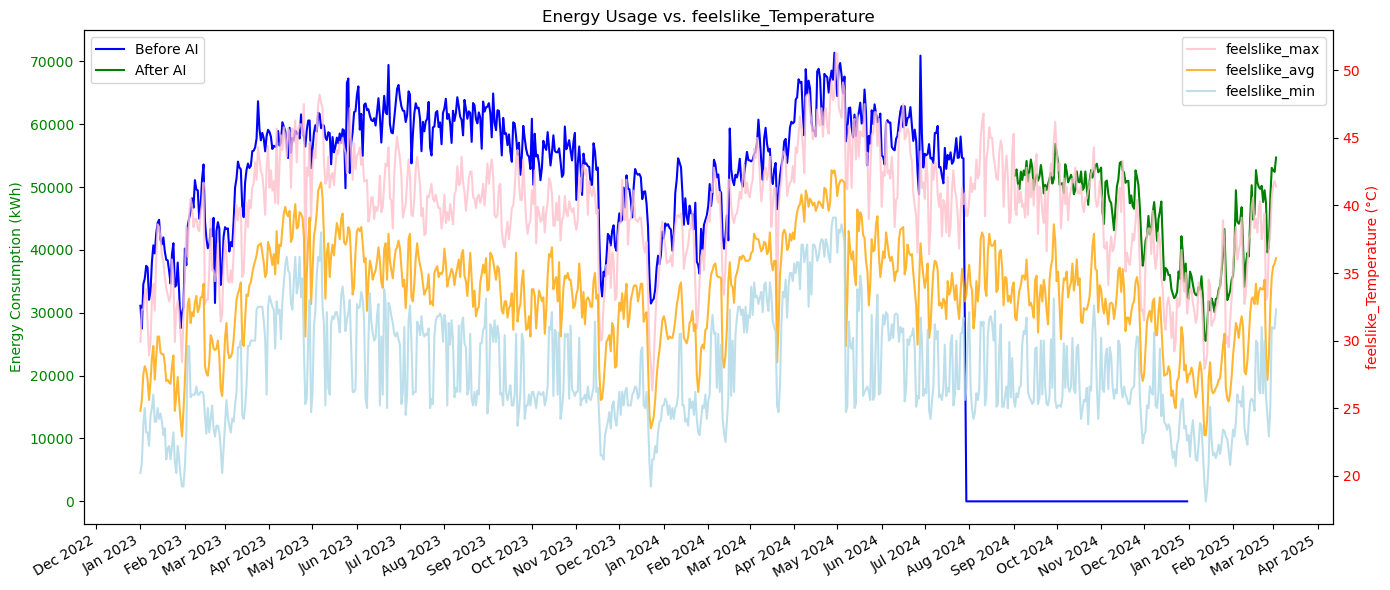

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot energy usage
ax1.plot(before_ai_data['date'], before_ai_data['plant_energy_before(kwh)'], label='Before AI', color='blue')
ax1.plot(after_ai_data['date'], after_ai_data['plant_energy_after(kwh)'], label='After AI', color='green')
ax1.set_ylabel("Energy Consumption (kWh)", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left')

# Plot temperature on second y-axis
ax2 = ax1.twinx()
ax2.plot(weather['date'], weather['feelslikemax'], label='feelslike_max', color='pink', alpha=0.8)
ax2.plot(weather['date'], weather['feelslike'], label='feelslike_avg', color='orange', alpha=0.8)
ax2.plot(weather['date'], weather['feelslikemin'], label='feelslike_min', color='lightblue', alpha=0.8)
ax2.set_ylabel("feelslike_Temperature (°C)", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Format x-axis to show month and year without duplicates
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Ex: Apr 2025

fig.autofmt_xdate()  # Rotate and align dates
plt.title("Energy Usage vs. feelslike_Temperature")
fig.tight_layout()
plt.show()


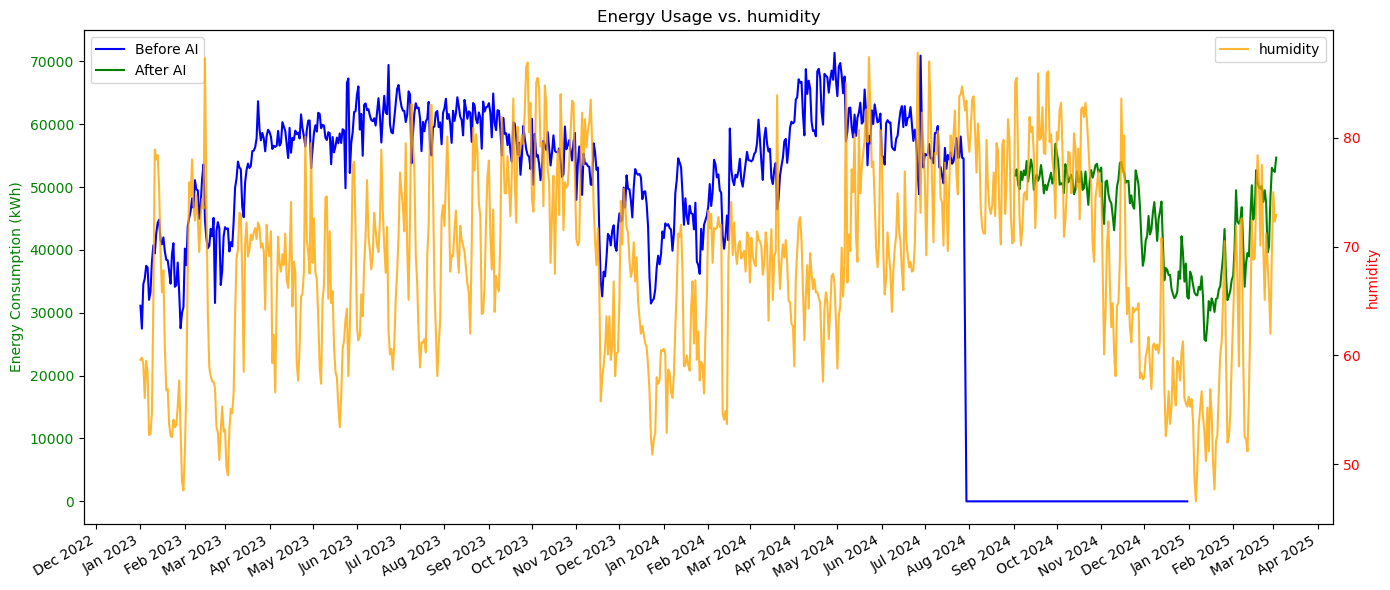

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot energy usage
ax1.plot(before_ai_data['date'], before_ai_data['plant_energy_before(kwh)'], label='Before AI', color='blue')
ax1.plot(after_ai_data['date'], after_ai_data['plant_energy_after(kwh)'], label='After AI', color='green')
ax1.set_ylabel("Energy Consumption (kWh)", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left')

# Plot temperature on second y-axis
ax2 = ax1.twinx()
ax2.plot(weather['date'], weather['humidity'], label='humidity', color='orange', alpha=0.8)
ax2.set_ylabel("humidity", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Format x-axis to show month and year without duplicates
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Ex: Apr 2025

fig.autofmt_xdate()  # Rotate and align dates
plt.title("Energy Usage vs. humidity")
fig.tight_layout()
plt.show()


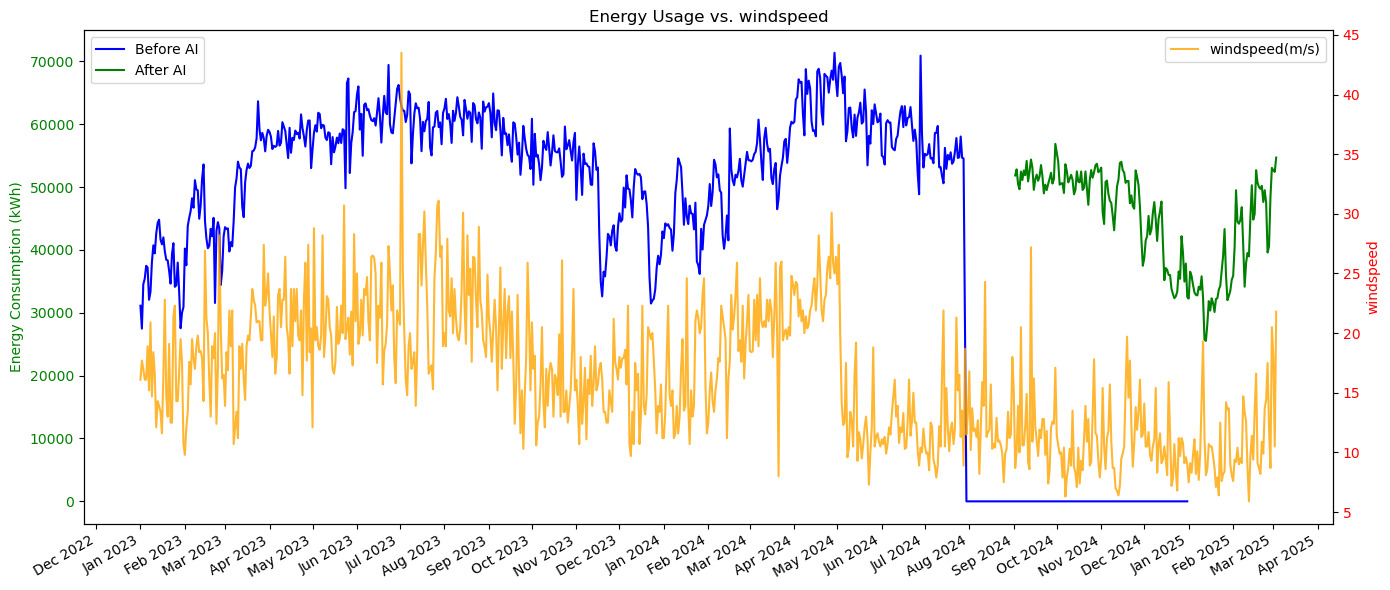

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot energy usage
ax1.plot(before_ai_data['date'], before_ai_data['plant_energy_before(kwh)'], label='Before AI', color='blue')
ax1.plot(after_ai_data['date'], after_ai_data['plant_energy_after(kwh)'], label='After AI', color='green')
ax1.set_ylabel("Energy Consumption (kWh)", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left')

# Plot temperature on second y-axis
ax2 = ax1.twinx()
ax2.plot(weather['date'], weather['windspeed'], label='windspeed(m/s)', color='orange', alpha=0.8)
ax2.set_ylabel("windspeed", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Format x-axis to show month and year without duplicates
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Ex: Apr 2025

fig.autofmt_xdate()  # Rotate and align dates
plt.title("Energy Usage vs. windspeed")
fig.tight_layout()
plt.show()


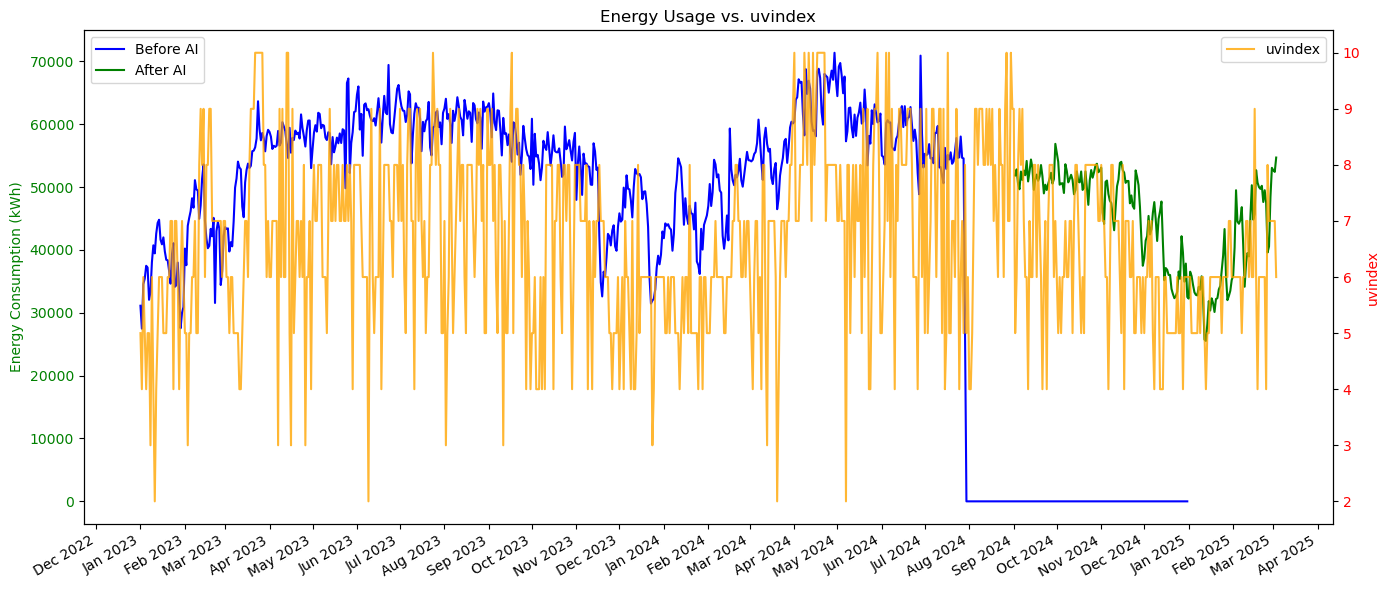

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot energy usage
ax1.plot(before_ai_data['date'], before_ai_data['plant_energy_before(kwh)'], label='Before AI', color='blue')
ax1.plot(after_ai_data['date'], after_ai_data['plant_energy_after(kwh)'], label='After AI', color='green')
ax1.set_ylabel("Energy Consumption (kWh)", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='upper left')

# Plot temperature on second y-axis
ax2 = ax1.twinx()
ax2.plot(weather['date'], weather['uvindex'], label='uvindex', color='orange', alpha=0.8)
ax2.set_ylabel("uvindex", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Format x-axis to show month and year without duplicates
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Ex: Apr 2025

fig.autofmt_xdate()  # Rotate and align dates
plt.title("Energy Usage vs. uvindex")
fig.tight_layout()
plt.show()


Merge data for train model

In [33]:
energy_df = pd.merge(before_ai_data, after_ai_data, on='date', how='outer')

In [34]:
# Convert date columns to datetime
weather['date'] = pd.to_datetime(weather['date'])

# Merge the two DataFrames on 'date'
energy_weather_df = pd.merge(energy_df, weather, on='date', how='left')

In [35]:
energy_weather_df

,date,plant_energy_before(kwh),plant_energy_after(kwh),tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,windspeed,uvindex
0,2023-01-01,31124.0,NaN,30.1,20.2,24.8,29.9,20.2,24.8,59.6,16.1,5
1,2023-01-02,27481.0,NaN,30.4,21.0,25.3,32.3,21.0,25.6,59.8,17.7,4
2,2023-01-03,34559.0,NaN,30.5,23.7,26.9,32.3,23.7,27.5,59.2,17.0,6
3,2023-01-04,35418.0,NaN,32.0,25.0,27.6,33.4,25.0,28.1,56.1,16.1,5
4,2023-01-05,37479.0,NaN,32.3,23.2,27.2,33.8,23.2,27.8,59.5,16.1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
787,2025-02-27,NaN,48390.0,35.5,25.1,30.1,38.1,25.1,32.5,62.0,8.7,7
788,2025-02-28,NaN,53064.0,34.4,27.2,30.1,40.5,31.0,34.7,69.5,20.5,7
789,2025-03-01,NaN,52680.0,34.5,27.3,29.9,41.5,30.9,35.5,75.0,18.0,7
790,2025-03-02,NaN,52420.0,35.0,27.2,30.3,41.8,30.9,35.7,72.3,10.5,7


Save Final dataset

In [36]:
energy_weather_df.to_csv('./Intern Dataset/energy_weather_df.csv', index=False)

In [38]:
merged_df = energy_weather_df

check null value

In [39]:
merged_df.isnull().sum()

date                          0
plant_energy_before(kwh)     62
plant_energy_after(kwh)     609
tempmax                       0
tempmin                       0
temp                          0
feelslikemax                  0
feelslikemin                  0
feelslike                     0
humidity                      0
windspeed                     0
uvindex                       0
dtype: int64

In [40]:
merged_df.columns

Index(['date', 'plant_energy_before(kwh)', 'plant_energy_after(kwh)',
       'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'windspeed', 'uvindex'],
      dtype='object')

In [41]:
df = merged_df[['date', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
       'windspeed', 'uvindex', 'plant_energy_before(kwh)']]

# Filter the DataFrames to the specified date range
start_date = '2023-01-01'
end_date = '2024-07-28'

df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [42]:
df.head()

,date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,windspeed,uvindex,plant_energy_before(kwh)
0,2023-01-01,30.1,20.2,24.8,29.9,20.2,24.8,59.6,16.1,5,31124.0
1,2023-01-02,30.4,21.0,25.3,32.3,21.0,25.6,59.8,17.7,4,27481.0
2,2023-01-03,30.5,23.7,26.9,32.3,23.7,27.5,59.2,17.0,6,34559.0
3,2023-01-04,32.0,25.0,27.6,33.4,25.0,28.1,56.1,16.1,5,35418.0
4,2023-01-05,32.3,23.2,27.2,33.8,23.2,27.8,59.5,16.1,4,37479.0


In [43]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [44]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

<AxesSubplot:>

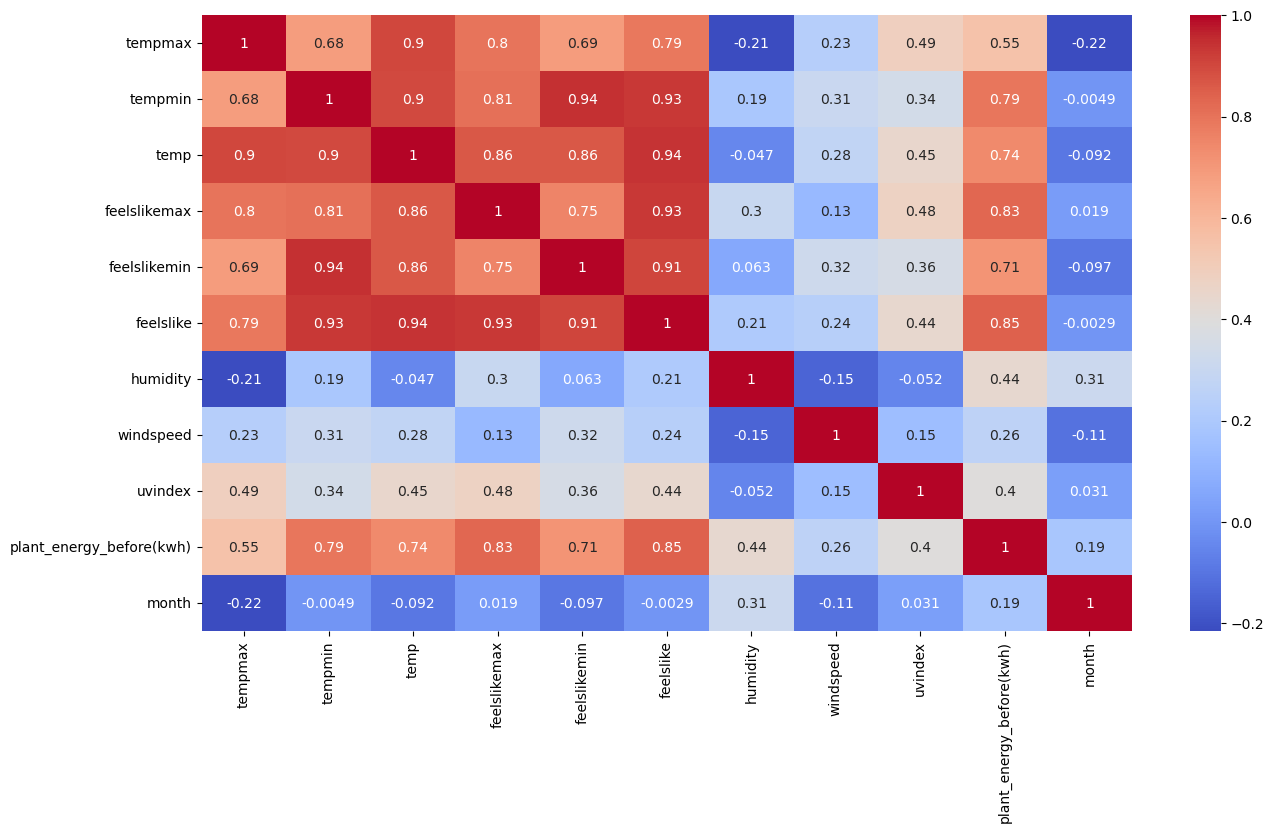

In [45]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only= True), annot=True, cmap="coolwarm")

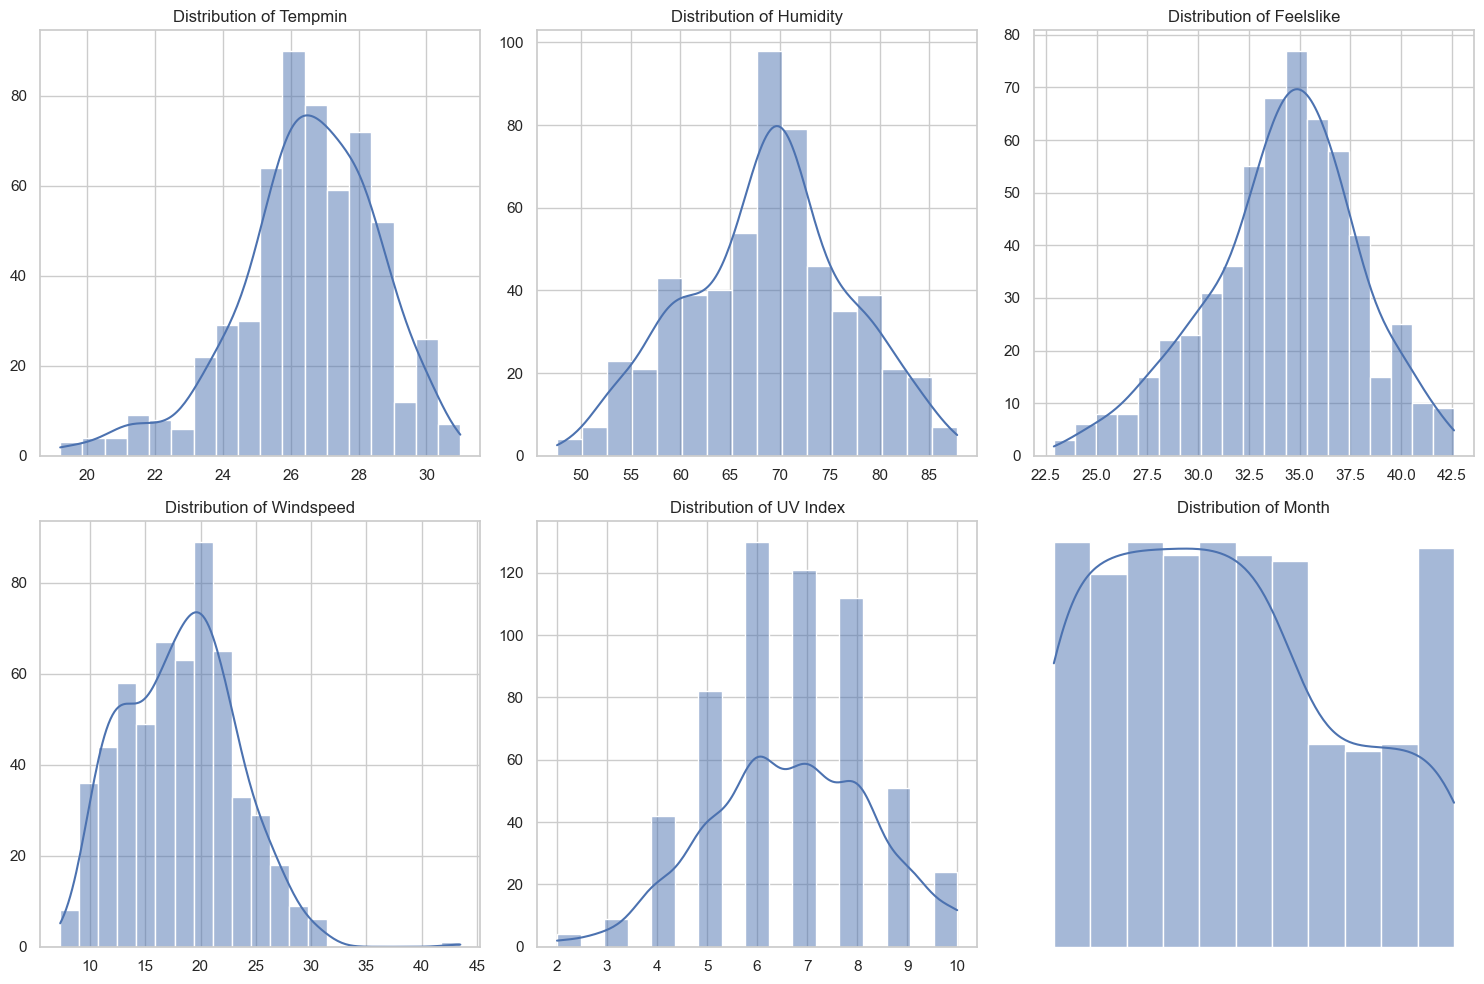

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Create a 2x3 subplot layout for 6 features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes to make indexing easier
axes = axes.flatten()

# List of features to plot
features = ['tempmin', 'humidity', 'feelslike', 'windspeed', 'uvindex', 'month']

# Titles for each subplot
titles = [
    'Distribution of Tempmin',
    'Distribution of Humidity',
    'Distribution of Feelslike',
    'Distribution of Windspeed',
    'Distribution of UV Index',
    'Distribution of Month'
]

# Plot the distribution of each feature
for i, (feature, title) in enumerate(zip(features, titles)):
    sns.histplot(data=df, x=feature, ax=axes[i], kde=True)
    axes[i].set_title(title)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide the last subplot (if necessary)
axes[5].axis('off')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


# 3. Preprocessing

Scale and Train_Test split The Features

In [47]:
import numpy as np

df['month'] = df['date'].dt.month
# Assuming you already have a 'month' column (1 = January, 12 = December)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [49]:
df.head()

,date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,windspeed,uvindex,plant_energy_before(kwh),month,month_sin,month_cos
0,2023-01-01,30.1,20.2,24.8,29.9,20.2,24.8,59.6,16.1,5,31124.0,1,0.5,0.866025
1,2023-01-02,30.4,21.0,25.3,32.3,21.0,25.6,59.8,17.7,4,27481.0,1,0.5,0.866025
2,2023-01-03,30.5,23.7,26.9,32.3,23.7,27.5,59.2,17.0,6,34559.0,1,0.5,0.866025
3,2023-01-04,32.0,25.0,27.6,33.4,25.0,28.1,56.1,16.1,5,35418.0,1,0.5,0.866025
4,2023-01-05,32.3,23.2,27.2,33.8,23.2,27.8,59.5,16.1,4,37479.0,1,0.5,0.866025


In [50]:
df.columns

Index(['date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'windspeed', 'uvindex',
       'plant_energy_before(kwh)', 'month', 'month_sin', 'month_cos'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split

features = ['tempmin', 'humidity', 'feelslike', 'windspeed', 'uvindex', 'month_sin', 'month_cos']
X = df[features]  # features
y = df['plant_energy_before(kwh)']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((402, 7), (173, 7), (402,), (173,))

In [53]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['tempmin', 'humidity', 'feelslike', 'windspeed', 'uvindex']  # example
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [85]:
import joblib

# Save to file
joblib.dump(scaler, './model/scaler.pkl')


['./model/scaler.pkl']

In [54]:
X_train.head()

,tempmin,humidity,feelslike,windspeed,uvindex,month_sin,month_cos
354,-1.093124,-1.197870,-1.546845,0.480104,-0.411850,-2.449294e-16,1.000000e+00
149,-0.133133,1.127293,-0.036451,2.076512,0.823700,5.000000e-01,-8.660254e-01
124,1.690850,-0.653683,1.844916,0.152635,0.823700,5.000000e-01,-8.660254e-01
432,0.826858,0.224437,0.758493,1.319241,-0.411850,1.000000e+00,6.123234e-17
322,-2.389112,-1.333917,-2.235797,-0.420434,0.205925,-5.000000e-01,8.660254e-01


# 4. Model Selection

Cross validation with 4 models 

consist of Linear Regression, Ridge Regression, Random Forest, and Gradient Boosting because each one offers unique strengths that are useful for predicting energy usage. 

Linear Regression is a basic model that helps us understand the general relationship between things like temperature or humidity and how much energy is used. It’s simple, fast, and easy to explain, which makes it a good starting point. 

Ridge Regression is similar, but it adds some protection against problems that can happen when input data is strongly related to each other, such as temperature and humidity being high at the same time. This helps the model make more stable and reliable predictions.

Random Forest is a more advanced model that can find complex patterns in the data. This is helpful because energy usage is not always predictable using simple rules — it can change in complicated ways depending on the weather, time of day, and other factors. Random Forest is also good at handling messy or unusual data. 

Gradient Boosting is another powerful model that tries to improve prediction accuracy by learning from mistakes step by step. It is often used in real-world systems because it gives very accurate results when well-tuned.

By testing all four models, comparing their performance and choose the best one for dashboard. This helps ensure that the energy savings estimates will provide as accurate and useful as possible.


In [57]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

# Your models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "LinearRegression": LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# K-Fold Cross Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = {}

for model_name, model in models.items():
    r2s, rmses, cvrmses, nmbes = [], [], [], []

    for train_idx, test_idx in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
        y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)

        r2 = r2_score(y_test_cv, y_pred_cv)
        rmse = root_mean_squared_error(y_test_cv, y_pred_cv)
        cvrmse = rmse / y_test_cv.mean()
        nmbe = (y_pred_cv.mean() - y_test_cv.mean()) / y_test_cv.mean()

        r2s.append(r2)
        rmses.append(rmse)
        cvrmses.append(cvrmse)
        nmbes.append(nmbe)

    results[model_name] = {
        "R2": np.mean(r2s),
        "RMSE": np.mean(rmses),
        "CVRMSE": np.mean(cvrmses),
        "NMBE": np.mean(nmbes)
    }

# Display Results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")



Model: LinearRegression
R2: 0.8752
RMSE: 2983.0330
CVRMSE: 0.0551
NMBE: 0.0001

Model: Ridge Regression
R2: 0.8752
RMSE: 2982.9285
CVRMSE: 0.0551
NMBE: 0.0001

Model: RandomForest
R2: 0.8839
RMSE: 2888.1120
CVRMSE: 0.0534
NMBE: -0.0019

Model: GradientBoosting
R2: 0.8831
RMSE: 2893.9419
CVRMSE: 0.0534
NMBE: -0.0001


Based on the results, the Random Forest and Gradient Boosting models gave better predictions than the Linear Regression and Ridge Regression models. They both had higher R² scores (0.8839 and 0.8831 for RandomForest and GradientBoosting), which means they were better at explaining the variation in the data. They also had lower RMSE and CVRMSE values, which shows they made more accurate and consistent predictions. In terms of bias, all models performed well, with very low NMBE values close to zero, meaning they didn’t overpredict or underpredict much. Another reason Random Forest and Gradient Boosting performed better is because they can handle more complex, non-linear patterns in the data — something linear models struggle with. Because of their strong performance and flexibility, Random Forest and Gradient Boosting are good choices to fine-tune further using GridSearch to get even better results.

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Example parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Example parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Create the models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Set up the GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Set up the GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV on training data for Random Forest
rf_grid_search.fit(X_train, y_train)

# Fit GridSearchCV on training data for Gradient Boosting
gb_grid_search.fit(X_train, y_train)

# Get the best model for Random Forest
best_rf_model = rf_grid_search.best_estimator_

# Get the best model for Gradient Boosting
best_gb_model = gb_grid_search.best_estimator_

# Evaluate the Random Forest model
rf_y_pred = best_rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = root_mean_squared_error(y_test, rf_y_pred)
print(f"Best Random Forest Model - R²: {rf_r2}, RMSE: {rf_rmse}")

# Evaluate the Gradient Boosting model
gb_y_pred = best_gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = root_mean_squared_error(y_test, gb_y_pred)
print(f"Best Gradient Boosting Model - R²: {gb_r2}, RMSE: {gb_rmse}")

# Display the best parameters for both models
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best Gradient Boosting Parameters: {gb_grid_search.best_params_}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Random Forest Model - R²: 0.8840225557401505, RMSE: 2774.1860379574423
Best Gradient Boosting Model - R²: 0.8866414764392507, RMSE: 2742.6848335774744
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


After trying different settings using GridSearchCV, the models were tested to find the best combinations of parameters for both Random Forest and Gradient Boosting. The goal was to improve accuracy by trying many different values like how many trees to use, how deep they should be, and how the models should split data. For Random Forest, the best result came from using 200 trees, a max depth of 20, and specific settings for how the data is split. This gave an R² score of 0.884 and an RMSE of about 2774, meaning it explained most of the data’s behavior and had a fairly low prediction error. For Gradient Boosting, the best setup used 100 trees, a learning rate of 0.05, a max depth of 5, and a subsample rate of 0.8. This model performed slightly better, with an R² score of 0.887 and an even lower RMSE of about 2743. In summary, both models improved after tuning, but Gradient Boosting gave the most accurate results.

Save the best model

In [60]:
# Best model and parameters
best_model = gb_grid_search.best_estimator_
print("Best Parameters:", gb_grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [61]:
import joblib
joblib.dump(best_model, './model/best_model.pkl')

['./model/best_model.pkl']

# 5. Testing

In [87]:
y_pred_gb = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred_gb)
rmse = root_mean_squared_error(y_test, y_pred_gb)
cvrmse = rmse / y_test.mean()
nmbe = (y_pred_gb.mean() - y_test.mean()) / y_test.mean()


In [88]:
print(f"r2: {r2}, rmse: {rmse}, cvrmse: {cvrmse}, nmbe: {nmbe}")

r2: 0.8866414764392507, rmse: 2742.6848335774744, cvrmse: 0.050261061657341295, nmbe: -0.0028415269318957854


The best parameters found were:

learning_rate: 0.05

max_depth: 5

n_estimators: 100

subsample: 0.8

The best model is Gradient Boosting, which gave strong results after trying different parameter settings. The R² score is 0.8866, meaning the model explains about 89% of the variation in the target data. This indicates a very good fit and shows that the model captures patterns in the data effectively.

The RMSE (Root Mean Squared Error) is 2742.68, which shows the average difference between predicted and actual values. A lower RMSE means better prediction accuracy, and this value suggests the model performs well.

The CVRMSE (Coefficient of Variation of RMSE) is 0.0503, a low value that indicates consistent and reliable predictions, with small errors relative to the average values.

The NMBE (Normalized Mean Bias Error) is -0.0028, which is very close to zero. This means the model has very little bias, and does not consistently overpredict or underpredict.

# 6. Analysis

In [89]:
import pandas as pd

# Random Forest example
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


     Feature  Importance
2  feelslike    0.696945
6  month_cos    0.124588
1   humidity    0.071407
5  month_sin    0.036999
0    tempmin    0.031381
3  windspeed    0.029505
4    uvindex    0.009176


C:\Users\Ekkar\AppData\Local\Temp\ipykernel_2560\4103212697.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


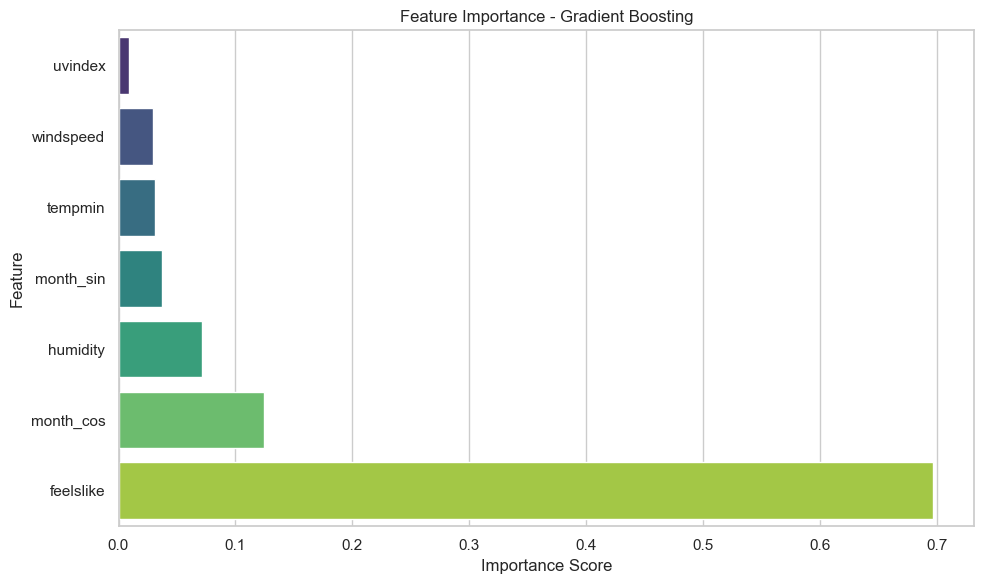

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Set the plot size
plt.figure(figsize=(10, 6))

# Create horizontal bar plot
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df,
    palette='viridis'
)

plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='plant_energy_before(kwh)'>

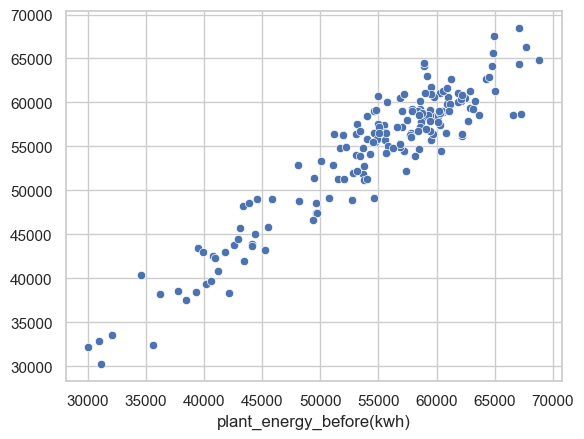

In [91]:
sns.scatterplot(x = y_test, y = y_pred_gb)

# 7. Inference

In [66]:
# Filter The DataFrames to the specified date range
start_date = '2024-07-29'
end_date = '2025-03-03'

future_df = energy_weather_df[(energy_weather_df['date'] >= start_date) & (energy_weather_df['date'] <= end_date)]
future_df['month'] = pd.to_datetime(future_df['date']).dt.month

C:\Users\Ekkar\AppData\Local\Temp\ipykernel_2560\2061084176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_df['month'] = pd.to_datetime(future_df['date']).dt.month


In [67]:
import numpy as np

# Assuming you already have a 'month' column (1 = January, 12 = December)
future_df['month_sin'] = np.sin(2 * np.pi * future_df['month'] / 12)
future_df['month_cos'] = np.cos(2 * np.pi * future_df['month'] / 12)

C:\Users\Ekkar\AppData\Local\Temp\ipykernel_2560\96961514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_df['month_sin'] = np.sin(2 * np.pi * future_df['month'] / 12)
C:\Users\Ekkar\AppData\Local\Temp\ipykernel_2560\96961514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_df['month_cos'] = np.cos(2 * np.pi * future_df['month'] / 12)


In [68]:
future_df[numerical_cols] = scaler.transform(future_df[numerical_cols])

C:\Users\Ekkar\AppData\Local\Temp\ipykernel_2560\1637614675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_df[numerical_cols] = scaler.transform(future_df[numerical_cols])


In [69]:
df.columns

Index(['date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'windspeed', 'uvindex',
       'plant_energy_before(kwh)', 'month', 'month_sin', 'month_cos'],
      dtype='object')

In [70]:
X_future = future_df[['tempmin', 'humidity', 'feelslike', 'windspeed', 'uvindex', 
                      'month_sin', 'month_cos']]

In [71]:
X_future.head()

,tempmin,humidity,feelslike,windspeed,uvindex,month_sin,month_cos
575,-0.037134,1.819895,-0.195440,-1.361906,-1.029624,-0.500000,-0.866025
576,0.250863,1.424123,0.122537,-1.013971,-0.411850,-0.500000,-0.866025
577,0.538861,1.238604,0.387519,-0.277167,-1.647399,-0.866025,-0.500000
578,-0.037134,1.485962,-0.009953,-1.627974,-1.647399,-0.866025,-0.500000
579,-0.757127,1.832263,-0.115946,-0.911637,-1.029624,-0.866025,-0.500000


In [72]:
# Predict using the best model
future_predictions = best_model.predict(X_future)

# Add predictions back to the DataFrame
future_df['predicted_plant_energy_before(kwh)'] = future_predictions

# Preview
print(future_df[['date', 'predicted_plant_energy_before(kwh)']])


          date  predicted_plant_energy_before(kwh)
575 2024-07-30                        56227.300031
576 2024-07-31                        58503.491116
577 2024-08-01                        60638.713740
578 2024-08-02                        59471.982635
579 2024-08-03                        59460.744512
..         ...                                 ...
787 2025-02-27                        50191.024494
788 2025-02-28                        51590.138056
789 2025-03-01                        53649.455806
790 2025-03-02                        54957.674721
791 2025-03-03                        54683.679749

[217 rows x 2 columns]


C:\Users\Ekkar\AppData\Local\Temp\ipykernel_2560\1777448098.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_df['predicted_plant_energy_before(kwh)'] = future_predictions


In [79]:
# before_ai_data1 = before_ai_data[before_ai_data["plant_energy_before(kwh)"]!=0]
before_ai_data1 = df

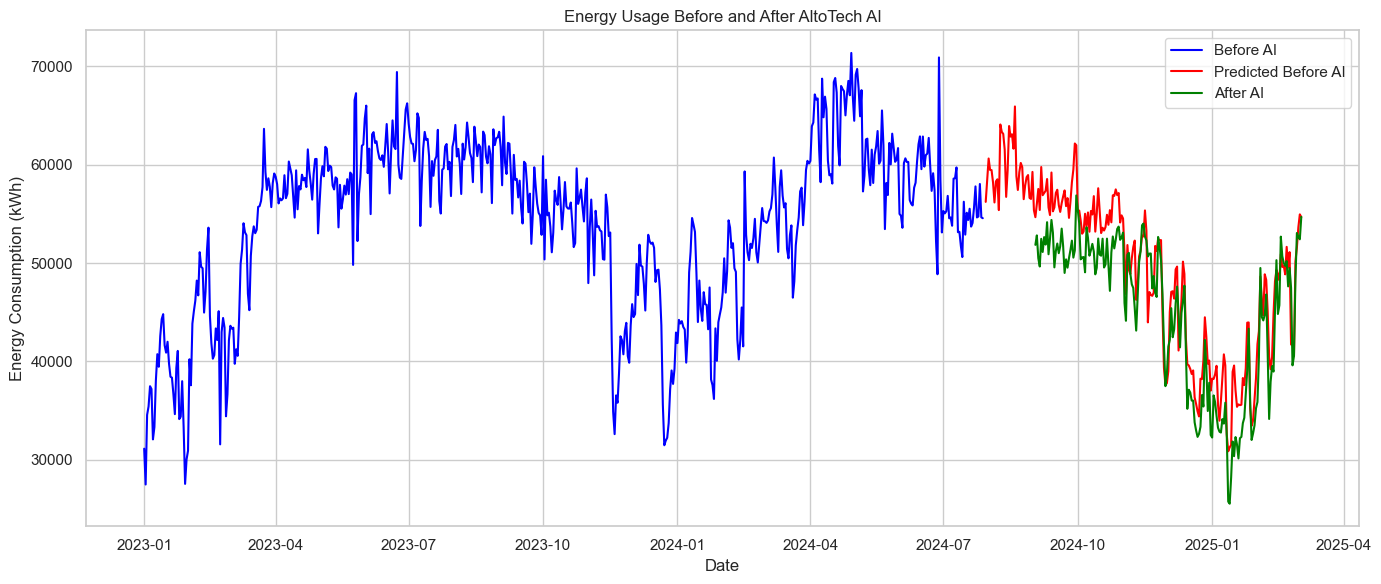

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(before_ai_data1['date'], before_ai_data1['plant_energy_before(kwh)'], label='Before AI', color='blue')
plt.plot(future_df['date'], future_df['predicted_plant_energy_before(kwh)'], label='Predicted Before AI', color='red')
plt.plot(after_ai_data['date'], after_ai_data['plant_energy_after(kwh)'], label='After AI', color='green')

plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Usage Before and After AltoTech AI')
plt.legend()
plt.tight_layout()
plt.show()


In [81]:
# predicted results are stored in `future_df`
# with a column `predicted_plant_energy_before(kwh)`
# and actual energy data is in `after_ai_data` with 'plant_energy_after(kwh)' and 'date'

after_ai_data['date'] = pd.to_datetime(after_ai_data['date'])
future_df['date'] = pd.to_datetime(future_df['date'])

# Merge on date
comparison_df = pd.merge(future_df[['date', 'predicted_plant_energy_before(kwh)']],
                         after_ai_data[['date', 'plant_energy_after(kwh)']],
                         on='date')


C:\Users\Ekkar\AppData\Local\Temp\ipykernel_2560\2179406838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_df['date'] = pd.to_datetime(future_df['date'])


In [82]:
# Calculate energy savings
comparison_df['savings_kwh'] = (
    comparison_df['predicted_plant_energy_before(kwh)'] -
    comparison_df['plant_energy_after(kwh)']
)

# Calculate percentage savings
comparison_df['savings_percent'] = (
    comparison_df['savings_kwh'] /
    comparison_df['predicted_plant_energy_before(kwh)']
) * 100


In [83]:
total_baseline_kwh = comparison_df['predicted_plant_energy_before(kwh)'].sum()
total_actual_kwh = comparison_df['plant_energy_after(kwh)'].sum()
total_savings_kwh = comparison_df['savings_kwh'].sum()
average_savings_percent = comparison_df['savings_percent'].mean()

print(f"Total predicted (baseline): {total_baseline_kwh:.2f} kWh")
print(f"Total actual usage: {total_actual_kwh:.2f} kWh")
print(f"Total savings: {total_savings_kwh:.2f} kWh")
print(f"Average % savings: {average_savings_percent:.2f}%")


Total predicted (baseline): 8740213.54 kWh
Total actual usage: 8229454.25 kWh
Total savings: 510759.29 kWh
Average % savings: 5.86%


In [84]:
# Priod from '2024-07-29' to '2025-03-03', around 7 months
# Example: Assume cost = 3.72 THB per kWh
cost_per_kwh = 3.72
estimated_cost_savings = total_savings_kwh * cost_per_kwh
estimated_cost_savings_per_month = estimated_cost_savings/7
print(f"Estimated cost savings: {estimated_cost_savings:.2f} THB")
print(f"Estimated cost savings per month: {estimated_cost_savings_per_month:.2f} THB")

Estimated cost savings: 1900024.58 THB
Estimated cost savings per month: 271432.08 THB
